In [17]:
colors = [ '#4cb963','#57c4e5', '#783f8e', '#ff5964','#BB9F06','#FFB8D1','#A26769','#084B83','#485665','#D972FF','#DEFFFC','#89023E','#F1ECCE','#474B24','#5FBB97','#B2ABBF','#FCF0CC']

In [139]:
from sage.combinat.cartesian_product import CartesianProduct_iters
import sympy as spy
import numpy as np

class Plano:
    
    def __init__(self, order):
        self.order = order
        self.field = GF(order)
        self.eField = self.getSortField()
        self.points = np.array(CartesianProduct_iters(self.eField,self.eField))
        self.mainLines = list()
        self.mainLinesList = list()
        self.lines = list()
    
    
     
    def getMainLines(self):
        if(not self.mainLinesList):
            self.__mainLines()
        
        return self.mainLines
    
    def getMainLinesList(self):
        return self.mainLinesList
    
    def getLines(self):
        if(not self.lines):
            self.__allLines()
        return self.lines
    
    def getCartesianMainLinesList(self):
        if(not self.mainLines):
            self.__mainLines()
            
        return Point.vCartesian(Point, self.mainLinesList, self.eField)
    
    def getCartesianLines(self):
        if(not self.lines):
            self.__allLines()
            
        return Point.vCartesian(Point, self.lines, self.eField)
    
    def __allLines(self):
        all_lines = []
        if(not self.mainLines):
            self.__mainLines()
        for mainLine in self.mainLines:
            all_lines.append(np.array(mainLine.getCartesianParallelLines()))
        
        
        self.lines =  all_lines
    
    
    def __mainLines(self):
        mainLines = list()
        mainLinesList = list()
        aPoints = np.reshape(np.array(self.points),[self.order,self.order,2])
        
        for dirP in aPoints[1,:]: 
            line =Line(dirP, self.eField)
            mainLines.append(line)
            mainLinesList.append(line.toList())
        
        line = Line(aPoints[0,:][1], self.eField)
        mainLines.append(line)
        mainLinesList.append(line.toList())
        self.mainLines = mainLines
        self.mainLinesList = mainLinesList
        
    def getOrder(self):
        return self.order
    
    def getField(self):   
        return self.field
    
    def getSortField(self):
        return Point.merge_sort(Point,(list(self.field)))
    
    def getPoints(self):
        return self.points
    
    def getNumbersValuesField(self,field):

        return Point.vCartesian(Point,field, field), field
    



In [140]:
from matplotlib import path

class Line:
    
    def __init__(self, dirP, field, b=np.array([0,0])):
        self.dirP= dirP
        self.field = field
        self.intercep = b
        self.line = self.__generetaLine()
        
        self.pathLine = path.Path(Point.vCartesian(Point,self.line,field))
        self.parallelLines = []
        
    
    def __generetaLine(self):
        product = lambda a,b,t: t*a + b;
        vproduct = np.vectorize(product,  excluded=['a', 'b'])
        vproduct.excluded.add(0)
        vproduct.excluded.add(1)

        
        return Point.merge_sort(Point,vproduct(self.dirP,self.intercep,self.field))

    
    def __parallelLines(self):
        lines = []
        for i in self.field:
            if len(self.line)>2:
                condition1 = self.line[1][0] == self.line[2][0]
                condition2 = self.line[1][1] == self.line[2][1]
            else:
                condition1 = self.line[1][0] == 0
                condition2 = self.line[1][1] == 0
                
            if condition1: 
                lines.append(Point.merge_sort(Point,self.dilatation(self.line,i,0,1)))
            elif condition2:
                lines.append(Point.merge_sort(Point,self.dilatation(self.line,0,i,1)))
            else:
                lines.append(Point.merge_sort(Point,self.dilatation(self.line,i,0,1)))
            
            self.parallelLines = lines
            
    def getField(self):
        return self.field
    
    def getPathLine(self):
        return self.pathLine
        
        
    def dilatation(self, l,a,b,y): #define una dilatacion como se especifica arriba
        return y*l + np.array([a,b])
    
    def getDirP(self):
        return self.dirP
    
    def toList(self):
        return self.line
    
    def getCartesianParallelLines(self):
        if(not self.parallelLines):
             self.__parallelLines()
        return self.parallelLines


In [207]:
class Point:
    
    def __init__(self,x,y, field):
        self.x = x
        self.y = y
        self.field = field
        
    @classmethod
    def initFromArray(self,xy, field):
        return Point(xy[0], xy[1], field)
        
    def getX(self):
        return self.x

    def getY(self):
        return self.y
    
    def getXY(self):
        return np.array([self.x, self.y])
    
    def getField(self):
        return self.field

    @staticmethod
    def vCartesian(self,a,F):
        vcartesian = np.vectorize(self.getCartesian,excluded=['G']) 
        vcartesian.excluded.add(1)
        return vcartesian(a,F)
    
    @staticmethod
    def vValueField(self,a,F):
        vvalueField = np.vectorize(self.getValueField,excluded=['F']) 
        vvalueField.excluded.add(1)
        return vvalueField(a,F)
    
    
    @staticmethod
    def getCartesian(a, G):
        valor = 0
        for i in range(len(G)):
            if(a == G[i]):
                valor = i
        return valor

    @staticmethod
    def getValueField(a, G):
        valor = 0
        for i in range(len(G)):
            if(a == i):
                valor = G[i]
        return valor
    
    @staticmethod
    def merge_sort(self, array):
    # If the input array contains fewer than two elements,
    # then return it as the result of the function
        if len(array) < 2:
            return array


        midpoint = len(array) // 2

        # Sort the array by recursively splitting the input
        # into two equal halves, sorting each half and merging them
        # together into the final result
        return self.__merge(
            left=Point.merge_sort(self,array[:midpoint]),
            right=Point.merge_sort(self,array[midpoint:]))

    def __merge(left, right):
        # If the first array is empty, then nothing needs
        # to be merged, and you can return the second array as the result
        #print('l',left,'r', right)
        if len(left) == 0:
            return right

        # If the second array is empty, then nothing needs
        # to be merged, and you can return the first array as the result
        if len(right) == 0:
            return left

        result = []
        index_left = index_right = 0


        # Now go through both arrays until all the elements
        # make it into the resultant array
        while len(result) < len(left) + len(right):
            # The elements need to be sorted to add them to the
            # resultant array, so you need to decide whether to get
            # the next element from the first or the second array
            try:
                if left[index_left][0] == right[index_right][0]:
                    condition = left[index_left][1] <= right[index_right][1]
                else:
                    condition = left[index_left][0] <= right[index_right][0]

                    
                
            except:
                condition = left[index_left] <= right[index_right]

            if condition:
                result.append(left[index_left])
                index_left += 1
            else:
                result.append(right[index_right])
                index_right += 1

            # If you reach the end of either array, then you can
            # add the remaining elements from the other array to
            # the result and break the loop
            if index_right == len(right):
                #print(result,left,right)
                for i in left[index_left:]:
                    result.append(i)
                break

            if index_left == len(left):
                #print(result,left,right)
                for i in right[index_right:]:
                    result.append(i)
                break

        #print(result)

        return result
        
    

In [208]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
#,3,4,5,7,8,9,11,13,16]
order=[2,3,4,5,7,8,9,11,13,16]
vPlane = np.vectorize(Plano)
planos = vPlane(order)
planosDict = dict(zip(order, planos))


wOption = widgets.Dropdown(options = ['one line dir', 'all dir', 'all lines dir'])
wOrder = widgets.Dropdown(options = order)
wSetLinesDir = widgets.Dropdown(options=[])

# Updates the image options based on directory value

def update_order(*args):
    if wOption.value == 'one line dir' or wOption.value == 'all dir':
        wSetLinesDir.options =[]
    else:  
        wSetLinesDir.options =np.arange(wOrder.value+1).tolist()
    
def update_option(*args):
    if wOption.value == 'one line dir' or wOption.value == 'all dir':
        wSetLinesDir.options =[]
    else:  
        wSetLinesDir.options =np.arange(wOrder.value+1).tolist()


# Tie the image options to directory value
wOrder.observe(update_order, 'value')
wOption.observe(update_option, 'value')


def interactive_plot_plane(option, order,set_lines_dir): 
    myPlots = PlotPlanes(order, 8, colors, '')
    if  wOption.value == 'one line dir':
        myPlots.plot_lines_set(planosDict[order].getCartesianMainLinesList(), False)
    elif wOption.value == 'all dir':
        myPlots.plot_plano(planosDict[order].getCartesianLines())
    else:
        myPlots.plot_dir(planosDict[order].getCartesianLines()[set_lines_dir],set_lines_dir)

        
    
_ = interact(interactive_plot_plane, order=wOrder, set_lines_dir=wSetLinesDir, option = wOption)


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


In [153]:
class PlotPlanes:
    def __init__(self, ngrid,size,colors,folder):
        self.ngrid = ngrid
        self.size = size
        self.colors = colors
        self.folder = folder
        
    def plot_lines_set(self, lines, sort):
        npoints = self.ngrid

        fig, ax = plt.subplots(figsize=(self.size, self.size))

        xpoint = np.matrix(np.arange(npoints))
        ax.set_facecolor("black")

        plt.xticks(np.arange(0, self.ngrid+1, 1.0))
        plt.yticks(np.arange(0, self.ngrid+1, 1.0))

        for i in range(npoints):
            ax.plot(xpoint, np.ones(len(xpoint))*i, '*',color = 'r')

        for i in range(len(lines)):
            if sort:
                line = np.array(merge_sort(lines[i]))
            else:
                line = np.array((lines[i]))
            ax.plot(line[:,0],line[:,1], color = self.colors[i])

        plt.show()

        fig.savefig(f'{self.folder}linasPrincipalesCadaDireccion{npoints}.png')
        fig.savefig(f'{self.folder}linasPrincipalesCadaDireccion{npoints}.svg')
        
    def plot_plano(self, alines):
        npoints = self.ngrid
        xpoint = np.matrix(np.arange(npoints))


        fig, ax = plt.subplots(figsize=(self.size, self.size))
        plt.xticks(np.arange(0, self.ngrid+1, 1.0))
        plt.yticks(np.arange(0, self.ngrid+1, 1.0))

        xpoint = np.matrix(np.arange(npoints))
        ax.set_facecolor("black")

        for i in range(len(alines)):
            for j in range(npoints):
                ax.plot(xpoint, np.ones(len(xpoint))*j, '*',color = 'r')
            for line in alines[i]:
                lineO = np.array((line))
                ax.plot(line[:,0],line[:,1], color = self.colors[i])

        plt.show()
        fig.savefig(f'{self.folder}tpdoElPlano.png')
        fig.savefig(f'{self.folder}tpdoElPlano.svg')
        
    def plot_dir(self,dirP, color):
        fig, ax = plt.subplots(figsize=(self.size, self.size))

        xpoint = np.matrix(np.arange(self.ngrid))
        ax.set_facecolor("black")

        plt.xticks(np.arange(0, self.ngrid+1, 1.0))
        plt.yticks(np.arange(0, self.ngrid+1, 1.0))

        for i in range(self.ngrid):
            ax.plot(xpoint, np.ones(len(xpoint))*i, '*',color = 'r')    

        for line in dirP:
            lineO = np.array(line)
            ax.plot(lineO[:,0],lineO[:,1], color = self.colors[color])
            
        plt.show()
        fig.savefig(f'{self.folder}linasDireccion{i}.png')
        fig.savefig(f'{self.folder}linasDireccion{i}.svg')      

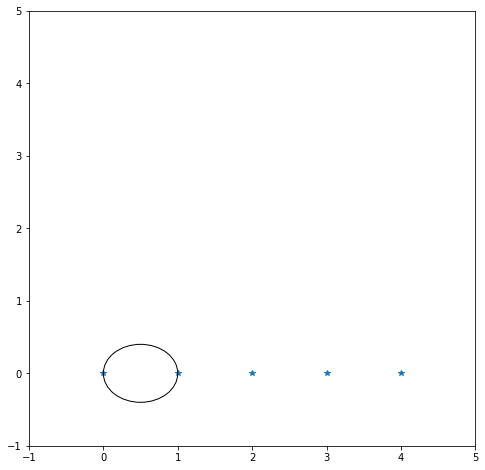

In [154]:
from matplotlib import pyplot as plt, patches, collections


e1 = patches.Arc(xy=(0.5, 0), width=1, height=0.8,zorder = 2,angle=0, theta1=0, theta2=180)
e2 = patches.Arc(xy=(0.5, 0), width=1, height=0.8,zorder = 2,angle=0, theta1=180, theta2=0)

fig, ax =  plt.subplots(figsize = (8,8))

ax.set_xlim([-1,5])
ax.set_ylim([-1,5])

ax.plot(np.arange(0,5), np.zeros(5),'*')

ax.add_patch(e1)
ax.add_patch(e2)

plt.show()



$(1,2)= (3,4) + (\alpha, \beta)$ 

$(1,1) = \gamma*(1,1) + (\alpha,\beta)$

$(3,3) = \gamma*(2,2) + (\alpha,\beta)$

$(0,2) = \gamma*(0,2) + (\alpha,\beta)$

$(2,0) = \gamma*(1,1) + (\alpha,\beta)$


$(0,0) = \gamma*(0,0) + (\alpha,\beta)$

$(0,3) = \gamma*(0,2) + (\alpha,\beta)$


$(3,3) = \gamma*(3,3) + (\alpha,\beta)$

$(3,4) = \gamma*(3,2) + (\alpha,\beta)$


$(1,2) = \gamma*(1,2) + (\alpha,\beta)$

$(3,4) = \gamma*(3,2) + (\alpha,\beta)$


In [266]:
def composition(t1,t2):
    return lambda xy: t1(t2(xy))


def determinate_translation(p1, p2):
    alpha = p2.getX() - p1.getX()
    beta = p2.getY() - p1.getY()
        
    parameters = np.array([alpha,beta,1])
    return lambda xy: xy + parameters[:2], parameters


def determinate_homotecy(p,pI,c):
    print('123vzxcv',c.getXY(), p.getXY(), pI.getXY())

    b = vector( [pI.getX(), pI.getY(), c.getX()])
    if c.getX() == p.getX():
        a = Matrix( [[1, 0, p.getX()],[0,1,p.getY()],[0,1,c.getX()]])
    else:
        a = Matrix( [[1, 0, p.getX()],[0,1,p.getY()],[1,0,c.getX()]])

    
    if c.getX() == 0 and c.getY() == 0 and (pI.getX()==0 or pI.getY()==0):
        if pI.getX()==0 and pI.getY()==0:
            parameters = a.solve_right(b)
        elif pI.getY()==0:
            parameters = [0,0, pI.getX()/p.getX()]
        elif pI.getX()==0:
            parameters = [0,0, pI.getY()/p.getY()]
    else :
        parameters = a.solve_right(b)

    
    
    return lambda xy: xy*parameters[2] + parameters[:2], parameters 

def determinate_central_simymetry_c(c,p):
    print('hola',c.getXY(), p.getXY(),)

    t,pt = determinate_translation(p, c)
    t2 = composition(t,t)
    p1 = Point.initFromArray(t2(p.getXY()), p.getField())
    h,p = determinate_homotecy(p, p1, c)
    
    return h,p

def determinate_parallel_simmetryLM(lineL, lineM):
    pathL = lineL.getPathLine()
    pathM = lineM.getPathLine()
    #print(pathL,pathM)
    F = np.array(lineL.getField())
    
    centers = list()
    points = list()
    if pathL.intersects_path(pathM):
        parallelsM = np.array(Point.vCartesian(Point, lineM.getCartesianParallelLines(),lineM.getField()))
        for lm in parallelsM:
            for p in lm:
                if(pathL.contains_point(p,radius=0.2)):
                    fp = Point.vValueField(Point, p,F)
                    
                    for pp in lm:
                        vpp = Point.vValueField(Point, pp,F)
                        if(fp +F[2]*vpp)[0] != fp[0] or (fp +F[2]*vpp)[1] != fp[1]:
                            point = fp + F[2]*vpp
                            break
                    points.append(point)
                    centers.append(fp)
                    break
                    
    vDeterminate_central_simmetry_c = np.vectorize(determinate_central_simmetry_c)
    vPoint = np.vectorize(Point,excluded=['field'])
    vPoint.excluded.add(2)
    

    #points = Point.vValueField(Point, np.array(parallelsM)[:,(Point.getCartesian(lineL.toList()[0][0],F)+3)%len(lineL.toList()[0]),:],F)

    centerPoints = vPoint(np.array(centers)[:,0],np.array(centers)[:,1], lineL.getField())
    pointsI = vPoint(np.array(points)[:,0],np.array(points)[:,1], lineL.getField())
    
    print('p', len(points), 'c',len(centers))

    
    scs = vDeterminate_central_simmetry_c(centerPoints,pointsI)
    
    return scs,Point.vValueField(Point,parallelsM,F)
    
plano = Plano(9)
F = plano.getSortField()

p1L = Point(F[1],F[1],F)
p2L = Point(F[3],F[3],F)

p1M = Point(F[3],F[2],F)
p2M = Point(F[0],F[2],F)

print(F[3] + F[6])

scs, parallels = determinate_parallel_simmetryLM(Line(p2L.getXY()-p1L.getXY(),F,p1L.getXY() ),Line(p2M.getXY()-p1M.getXY(),F,p1M.getXY()))

print(len(scs[0]))

0
p 9 c 9
123vzxcv [2 2] [2 0] [2 1]
123vzxcv [2 2] [2 0] [2 1]
123vzxcv [0 0] [2 0] [1 0]
123vzxcv [1 1] [1 0] [1 2]
123vzxcv [z2 + 2 z2 + 2] [z2 + 2 0] [z2 + 2 2*z2 + 1]
123vzxcv [z2 z2] [z2 0] [z2 2*z2]
123vzxcv [z2 + 1 z2 + 1] [z2 + 1 0] [z2 + 1 2*z2 + 2]
123vzxcv [2*z2 + 2 2*z2 + 2] [2*z2 + 2 0] [2*z2 + 2 z2 + 1]
123vzxcv [2*z2 2*z2] [2*z2 0] [2*z2 z2]
123vzxcv [2*z2 + 1 2*z2 + 1] [2*z2 + 1 0] [2*z2 + 1 z2 + 2]
9


123vzxcv [0 0] [z2 0] [2*z2 0]


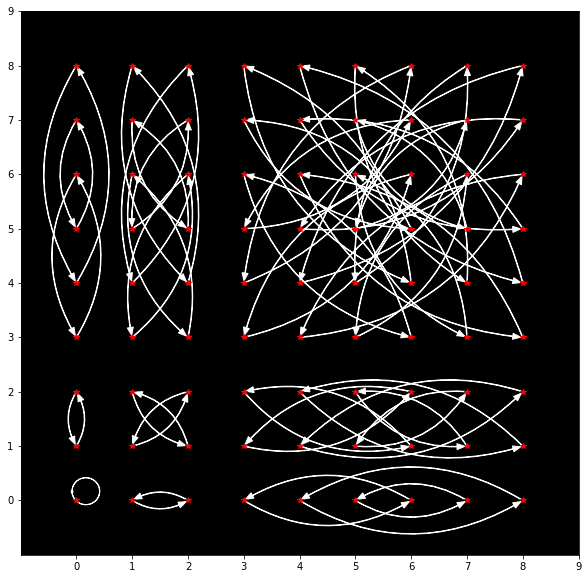

In [251]:

def plotCentralSymmetryC(c,plano,size):
    npoints = plano.getOrder()
    F = plano.getSortField()
    F2 = plano.getPoints()
    fig, ax = plt.subplots(figsize=(size, size))
    plt.yticks(np.arange(0, npoints+1, 1.0))
    ax.set_facecolor("black")

    xpoint = np.matrix(np.arange(npoints))
    ones = np.matrix(np.ones(npoints))
    #ax.set_facecolor("black")
    
    ax.plot(np.transpose(xpoint), np.transpose(ones)*xpoint, '*',color = 'r')
    style = "Simple, tail_width=0.5, head_width=6, head_length=8"

    kw = dict(arrowstyle=style, color="white")
    for p in F2:
        vp = Point.vCartesian(Point,p,F)
        if p[0] == c[0] and p[1] == c[1]:
            vc = Point.vCartesian(Point,c,F)
            make_loop(vc+0.17,0.25, ax, theta1=0, theta2=360)
        else:
            pp=Point(p[0],p[1],F)
            cp=Point(c[0],c[1],F)
            t,_ = determinate_translation(pp, cp)
            t2 = composition(t,t)
            ttp = t2(p)
            
            cp = vcartesian(p,F)
            cttp = vcartesian(ttp,F)
            #print(cp, cttp)
            a = patches.FancyArrowPatch(cp, cttp, connectionstyle="arc3,rad=0.3", **kw)
            
            ax.add_patch(a)


            
    ax.set_xlim([-1,npoints])
    ax.set_ylim([-1,npoints])

        
        
plano = Plano(9)
F = plano.getSortField()


#plotCentralSymmetryC(np.array([F[2],F[2]]),plano, 10)

c = Point(F[0],F[0],F)
p = Point(F[3],F[0],F)

sc,psc = determinate_central_simmetry_c(c,p)
aF2 = plano.getPoints()

tF2 = sc(aF2)

plot_translation(plano, tF2,10,'dilataciones',22)

In [252]:

order = 4
F = Point.merge_sort(Point,list(GF(order)))

print(F)

p1 = Point(F[0],F[0],F)
p2 = Point(F[2],F[2],F)
p3 = Point(F[1],F[1],F)

translation = determinate_translation(p1, p2)
homotecy = determinate_homotecy(p1, p2, p3)


F2 = CartesianProduct_iters(F,F)
aF2 = np.array(list(F2))
tupleF2 = list(map(tuple, aF2))
tF2 = aF2*translation[2] + translation[:2]
hF2 = aF2*homotecy[2] + homotecy[:2]



print(p1.getXY()*homotecy[2] + homotecy[:2])




[0, 1, z2, z2 + 1]
123vzxcv [1 1] [0 0] [z2 z2]


IndexError: tuple index out of range

In [ ]:
def plot_translation(plano,tF2,size,folder,i):
    npoints = plano.getOrder()
    F = plano.getSortField()
    F2 = plano.getPoints()
    
    fig, ax = plt.subplots(figsize=(size, size))
    ax.set_facecolor("black")
    
    plt.xticks(np.arange(0, npoints+1, 1.0))
    plt.yticks(np.arange(0, npoints+1, 1.0))

    xpoint = np.matrix(np.arange(npoints))
    ones = np.matrix(np.ones(npoints))
    #ax.set_facecolor("black")
    
    ax.plot(np.transpose(xpoint), np.transpose(ones)*xpoint, '*',color = 'r')
    style = "Simple, tail_width=0.5, head_width=6, head_length=8"

    kw = dict(arrowstyle=style, color="white")
    
    cF2 = vcartesian(F2, F)
    ctF2 = vcartesian(tF2, F)
    arc = vget_arc(F2[:,0],F2[:,1],tF2[:,0],tF2[:,1],F)
    for pos in range(len(cF2)):
        
        
        #x1 = Point.getCartesian(F2[pos,0], F)
        #x2 = Point.getCartesian(tF2[pos,0], F)
        
        #y1 = Point.getCartesian(F2[pos,1], F)
        #y2 = Point.getCartesian(tF2[pos,1], F)
        
        #deltaX = Point.getCartesian(F2[pos,0], F)-Point.getCartesian(tF2[pos,0], F)
        #deltaY = Point.getCartesian(F2[pos,1], F)-Point.getCartesian(tF2[pos,1], F)
 

        #if deltaY == 0 and deltaX<0:
        #   e1 = patches.Arc(xy=(arc[0][pos], arc[1][pos]), width=arc[3][pos], height=arc[4][pos],zorder = 2,angle=arc[2][pos], theta2=arc[5][pos], theta1=arc[6][pos])
        #elif (deltaX>0 and deltaY>0 and np.abs(deltaX)<=np.abs(deltaY))or (deltaX<0 and deltaY<0 and np.abs(deltaX)>np.abs(deltaY)) :
        #   e1 = patches.Arc(xy=(arc[0][pos], arc[1][pos]), width=arc[3][pos], height=arc[4][pos],zorder = 2,angle=arc[2][pos], theta2=arc[5][pos], theta1=arc[6][pos])
        #elif ((deltaX>0 and deltaY<0 and np.abs(deltaY)<=np.abs(deltaX) ) or(deltaX<0 and deltaY>0 and np.abs(deltaY)>np.abs(deltaX)))and arc[2][pos]<0: 
        #    e1 = patches.Arc(xy=(arc[0][pos], arc[1][pos]), width=arc[3][pos], height=arc[4][pos],zorder = 2,angle=arc[2][pos], theta2=arc[5][pos], theta1=arc[6][pos])
        #else:
        #    e1 = patches.Arc(xy=(arc[0][pos], arc[1][pos]), width=arc[3][pos], height=arc[4][pos],zorder = 2,angle=arc[2][pos], theta1=arc[5][pos], theta2=arc[6][pos])
     
        #print(e1.get_path())
        if(cF2[pos][0] == ctF2[pos][0] and cF2[pos][1] == ctF2[pos][1]):
            #a = patches.FancyArrowPatch(cF2[pos], ctF2[pos], connectionstyle="arc3,rad=0.3", **kw)
            make_loop(cF2[pos]+0.17,0.25, ax, theta1=0, theta2=360)
            #help(a)
        else:
            a = patches.FancyArrowPatch(cF2[pos], ctF2[pos], connectionstyle="arc3,rad=0.3", **kw)
        
            ax.add_patch(a)
        #ax.add_patch(e2)
        ea = e1
    


    ax.set_xlim([-1,npoints])
    ax.set_ylim([-1,npoints])


    #ax.add_patch(e2)/
    
    fig.savefig(f'{folder}dilatacion{i}.png')
    fig.savefig(f'{folder}dilatacion{i}.svg') 

    plt.show()
    

plano = Plano(9)
F = plano.getSortField()

p1 = Point(F[0],F[0],F)
p2 = Point(F[1],F[1],F)
p3 = Point(F[0],F[0],F)

translation,_ = determinate_translation(p2, p1)
ti,_  = determinate_translation(p2, p1)
#homotecy = determinate_homotecy(p1, p2, p3, order)

aF2 = plano.getPoints()

tF2 = translation(aF2)
#hF2 = aF2*homotecy[2] + homotecy[:2]

tF2 = ti(aF2)
ti2 = composition(ti,ti)
tF3 = ti2(aF2)

print(homotecy)



vcartesian = np.vectorize(Point.getCartesian,excluded=['G']) 
vcartesian.excluded.add(1)

plot_translation(plano, tF2, 10 , 'dilataciones/', 6 )
plot_translation(plano, tF2, 10 , 'dilataciones/', 6 )

In [ ]:
def get_arc(x1,y1,x2,y2, F):    
    midX = (Point.getCartesian(x1, F) - Point.getCartesian(x2,F))/2
    midY = (Point.getCartesian(y1, F) - Point.getCartesian(y2,F))/2
    
    
    width = np.sqrt((2*midX)**2 + (2*midY)**2)
    height = width*0.16
    
    xCenter = midX+Point.getCartesian(x2,F)
    yCenter =  midY + Point.getCartesian(y2,F)
    
    angle0 = 0
    anglef = 180
    
    if width == 0:
        
        width = 0.3
        height = 0.3
        
        xCenter += width*0.38
        yCenter += height*0.38
        
        anglef = 360
        
    try:
        angle = np.arctan(midY/midX)*180/np.pi
    except ZeroDivisionError:
        if(midY < 0):
            angle = -90
        elif midY>0:
            angle = 90
        else:
            angle =0
        
    return 1.0*xCenter, 1.0*yCenter, angle,width, height,angle0,anglef


vget_arc = np.vectorize(get_arc,excluded=['F']) 
vget_arc.excluded.add(4)

In [ ]:
def make_loop(center, radius, ax, theta1=-30, theta2=180):
   rwidth = 0.005
   ring = patches.Wedge(center, radius, theta1, theta2, width=rwidth)
   offset = 0.02
   xcent = center[0] - radius + (rwidth / 2)
   left = [xcent - offset, center[1]]
   right = [xcent + offset, center[1]]
   bottom = [(left[0] + right[0]) / 2., center[1] - 0.05]
   arrow = plt.Polygon([left, right, bottom, left])
   p = collections.PatchCollection(
      [ring, arrow],
      edgecolor='white',
      facecolor='white'
   )
   ax.add_collection(p)    
    

In [253]:

order = 5
F = Point.merge_sort(Point,list(GF(order)))
F2 = CartesianProduct_iters(F,F)

c = Point(F[3],F[3],F)
p = Point(F[3],F[2],F)
pI = Point(F[3],F[4],F)
pp = Point(F[2],F[2],F)
pIp = Point(F[3],F[3],F)

aF2 = np.array(list(F2))

h11,parametros= determinate_homotecy(p,pI,c)
print(parametros)
h11p,_= determinate_homotecy(pp,pIp,c)
hc = composition(h11,h11p)
hcp = composition(h11p, h11)

tFp = h11(aF2)
tFpp = h11p(aF2)
tFp2 = hc(aF2)
tFhcp = hcp(aF2)

plot_translation(aF2, tFp, order,10,F,'dilataciones',22)
plot_translation(aF2, tFpp, order,10,F,'dilataciones',22)
plot_translation(aF2, tFp2, order,10,F,'dilataciones',22)
plot_translation(aF2, tFhcp, order,10,F,'dilataciones',22)
                 

123vzxcv [3 3] [3 2] [3 4]
(1, 1, 4)
123vzxcv [3 3] [2 2] [3 3]


TypeError: plot_translation() takes 5 positional arguments but 7 were given

In [254]:
order = 5
F = Point.merge_sort(Point,list(GF(order)))
F2 = CartesianProduct_iters(F,F)
aF2 = np.array(list(F2))

tF2 = aF2*F[4] + np.array([F[1], F[1]])

plot_translation(aF2, tF2, order,10 ,F, 'dilataciones/', 6 )


TypeError: plot_translation() takes 5 positional arguments but 7 were given

p 11 c 11
123vzxcv [2 2] [6 2] [9 2]
123vzxcv [2 2] [6 2] [9 2]
123vzxcv [3 3] [9 3] [8 3]
123vzxcv [4 4] [1 4] [7 4]
123vzxcv [5 5] [4 5] [6 5]
123vzxcv [6 6] [7 6] [5 6]
123vzxcv [7 7] [10 7] [4 7]
123vzxcv [8 8] [2 8] [3 8]
123vzxcv [9 9] [5 9] [2 9]
123vzxcv [10 10] [8 10] [1 10]
123vzxcv [0 0] [0 2] [0 9]
123vzxcv [1 1] [3 1] [10 1]
11


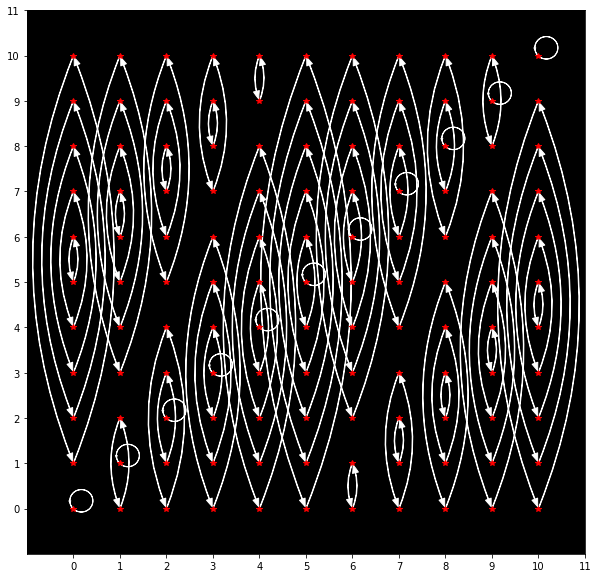

In [279]:
def plot_parallel_simetryLM(plano, scs, parallels, size,folder):
    npoints = plano.getOrder()
    F = plano.getSortField()
    
    fig, ax = plt.subplots(figsize=(size, size))
    ax.set_facecolor("black")
    
    plt.xticks(np.arange(0, npoints+1, 1.0))
    plt.yticks(np.arange(0, npoints+1, 1.0))

    xpoint = np.matrix(np.arange(npoints))
    ones = np.matrix(np.ones(npoints))
        
    ax.plot(np.transpose(xpoint), np.transpose(ones)*xpoint, '*',color = 'r')
    style = "Simple, tail_width=0.5, head_width=6, head_length=8"

    kw = dict(arrowstyle=style, color="white")

    
    for l in range(len(parallels)):
        lp =  scs[0][l](parallels[l]) 
        
        cl = Point.vCartesian(Point, parallels[l],F)
        clp = Point.vCartesian(Point, lp,F)
        for pos in range(len(cl)):
            if(cl[pos][0] == clp[pos][0] and cl[pos][1] == clp[pos][1]):
                make_loop(cl[pos]+0.17,0.25, ax, theta1=0, theta2=360)
            else:
                a = patches.FancyArrowPatch(cl[pos], clp[pos], connectionstyle="arc3,rad=0.2", **kw)
                ax.add_patch(a)
        
    ax.set_xlim([-1,npoints])
    ax.set_ylim([-1,npoints])
    
    fig.savefig(f'{folder}dilatacion{i}.png')
    fig.savefig(f'{folder}dilatacion{i}.svg') 

    plt.show()
    
plano = Plano(11)
F = plano.getSortField()



p1L = Point(F[1],F[1],F)
p2L = Point(F[3],F[3],F)

p1M = Point(F[2],F[1],F)
p2M = Point(F[2],F[0],F)


scs, parallels = determinate_parallel_simmetryLM(Line(p2L.getXY()-p1L.getXY(),F,p1L.getXY() ),Line(p2M.getXY()-p1M.getXY(),F,p1M.getXY()))
print(len(scs[0]), )
plot_parallel_simetryLM(plano, scs, parallels, 10,'')